Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

Data exploration

In [2]:
#Reading csv from file
df = pd.read_csv('./data/data.csv')

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
# Check for missing values in the DataFrame
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
# Display basic statistics about the numerical columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


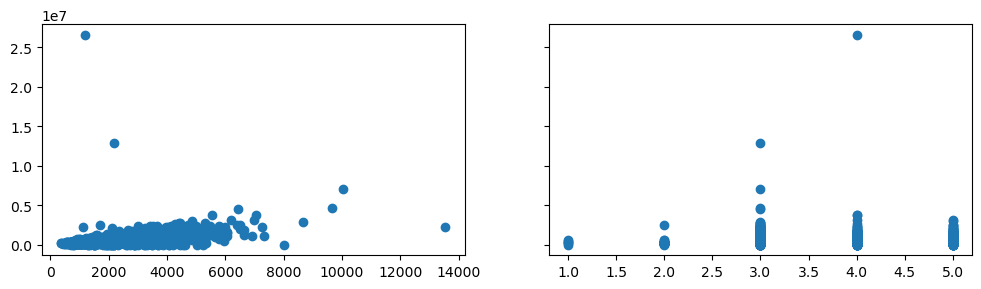

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
ax[0].scatter(df['sqft_living'],df['price'])
ax[1].scatter(df['condition'],df['price'])

Data Cleaning, Analysis and Visualization

In [8]:
df.drop(['date','country','street','city','statezip'],axis=1, inplace=True)
df = df[['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','bedrooms','bathrooms','floors','waterfront','view','condition', 'price']]
df

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,bedrooms,bathrooms,floors,waterfront,view,condition,price
0,1340,7912,1340,0,1955,2005,3.0,1.50,1.5,0,0,3,3.130000e+05
1,3650,9050,3370,280,1921,0,5.0,2.50,2.0,0,4,5,2.384000e+06
2,1930,11947,1930,0,1966,0,3.0,2.00,1.0,0,0,4,3.420000e+05
3,2000,8030,1000,1000,1963,0,3.0,2.25,1.0,0,0,4,4.200000e+05
4,1940,10500,1140,800,1976,1992,4.0,2.50,1.0,0,0,4,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1510,6360,1510,0,1954,1979,3.0,1.75,1.0,0,0,4,3.081667e+05
4596,1460,7573,1460,0,1983,2009,3.0,2.50,2.0,0,0,3,5.343333e+05
4597,3010,7014,3010,0,2009,0,3.0,2.50,2.0,0,0,3,4.169042e+05
4598,2090,6630,1070,1020,1974,0,4.0,2.00,1.0,0,0,3,2.034000e+05


In [9]:
scaler = StandardScaler()

data = df.to_numpy()

#Compute the mean and std to be used for later scaling.
data[:,:7] = scaler.fit_transform(data[:,:7])

data_scaled = data
df_scaled = pd.DataFrame(data_scaled)

In [10]:
df_scaled.columns = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','bedrooms','bathrooms','floors','waterfront','view','condition', 'price']
df_scaled

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,bedrooms,bathrooms,floors,waterfront,view,condition,price
0,-0.829971,-0.193434,-0.565224,-0.672464,-0.531014,1.221670,-0.441122,1.50,1.5,0.0,0.0,3.0,3.130000e+05
1,1.568528,-0.161718,1.789559,-0.069128,-1.674693,-0.825693,1.759705,2.50,2.0,0.0,4.0,5.0,2.384000e+06
2,-0.217367,-0.080978,0.119171,-0.672464,-0.161000,-0.825693,-0.441122,2.00,1.0,0.0,0.0,4.0,3.420000e+05
3,-0.144686,-0.190145,-0.959621,1.482306,-0.261913,-0.825693,-0.441122,2.25,1.0,0.0,0.0,4.0,4.200000e+05
4,-0.206984,-0.121306,-0.797222,1.051352,0.175376,1.208396,0.659291,2.50,1.0,0.0,0.0,4.0,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.653458,-0.236689,-0.368025,-0.672464,-0.564651,1.195121,-0.441122,1.75,1.0,0.0,0.0,4.0,3.081667e+05
4596,-0.705374,-0.202882,-0.426025,-0.672464,0.410840,1.225755,-0.441122,2.50,2.0,0.0,0.0,3.0,5.343333e+05
4597,0.904009,-0.218462,1.371962,-0.672464,1.285418,-0.825693,-0.441122,2.50,2.0,0.0,0.0,3.0,4.169042e+05
4598,-0.051238,-0.229164,-0.878421,1.525401,0.108101,-0.825693,0.659291,2.00,1.0,0.0,0.0,3.0,2.034000e+05


array([[<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

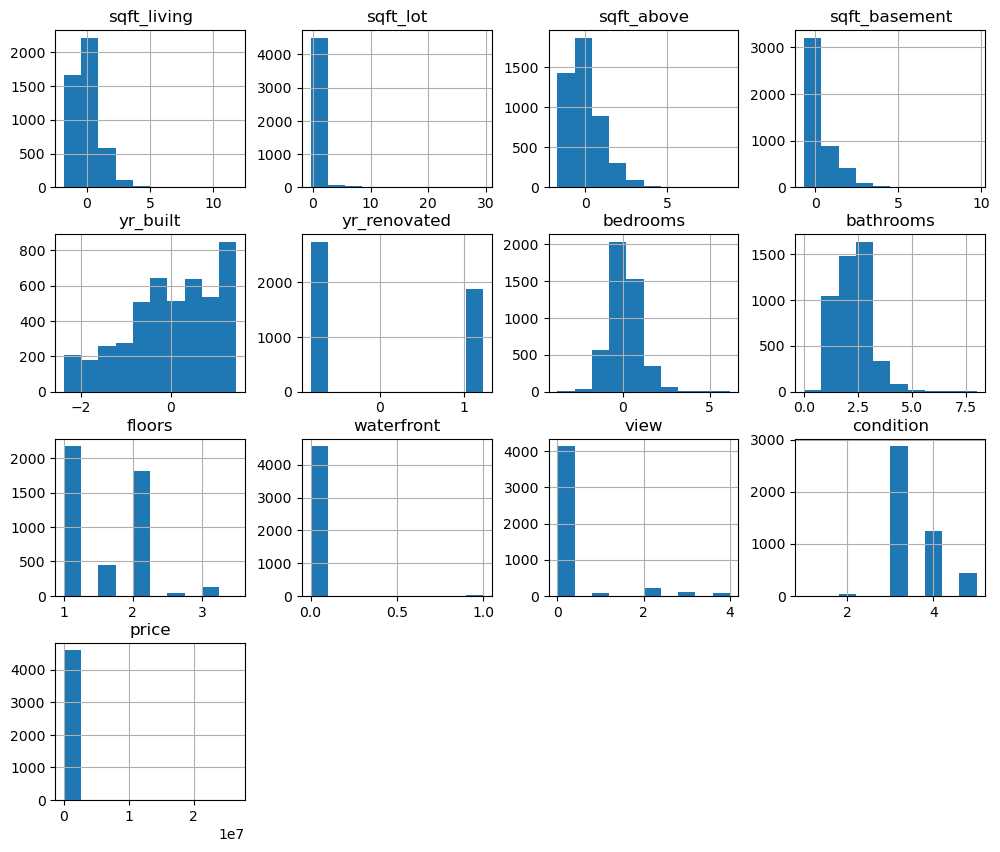

In [11]:
df_scaled.hist(figsize=(12,10))

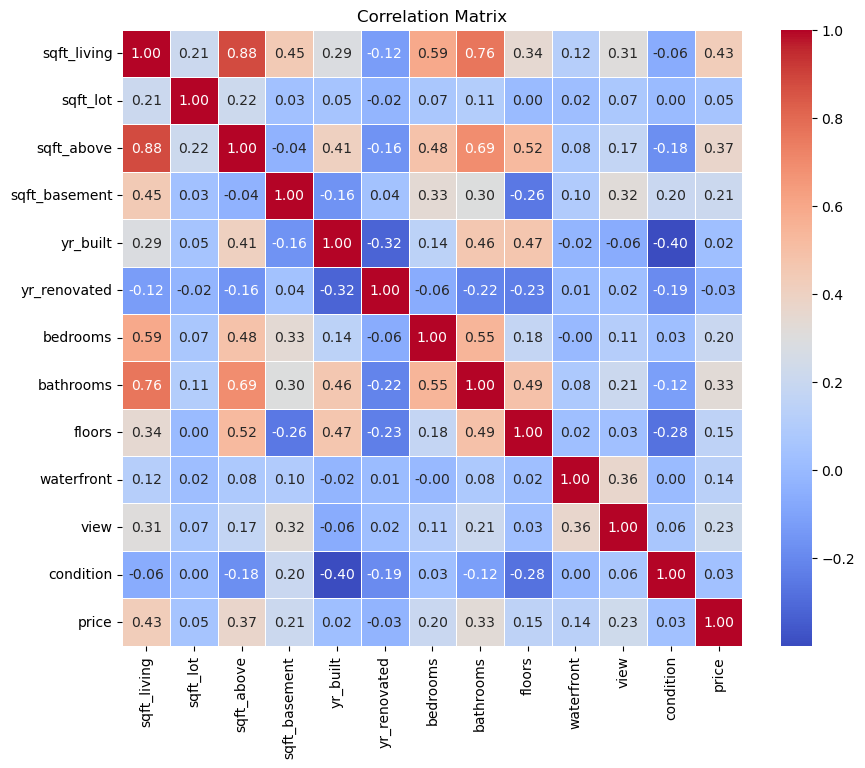

In [12]:
# Calculate correlation matrix
correlation_matrix = df_scaled.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [29]:
# splitting data into train and test

data_scaled
X = data_scaled[:,:-1]
y = data_scaled[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
l_reg = linear_model.LinearRegression()
l_reg.fit(X_train,y_train)

y_pred = l_reg.predict(X_test)

In [31]:
# The coefficients
print("Coefficients: \n", l_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f\n\n" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f\n\n" % r2_score(y_test, y_pred))

Coefficients: 
 [-3.52701235e+18 -2.09920000e+04  3.15703779e+18  1.69954940e+18
 -6.80734896e+04  7.50516457e+03 -4.62262705e+04  7.35458934e+04
  2.55935463e+04  2.22784562e+05  5.41735673e+04  3.12065403e+04]
Mean squared error: 79335365122.15


Coefficient of determination: 0.55




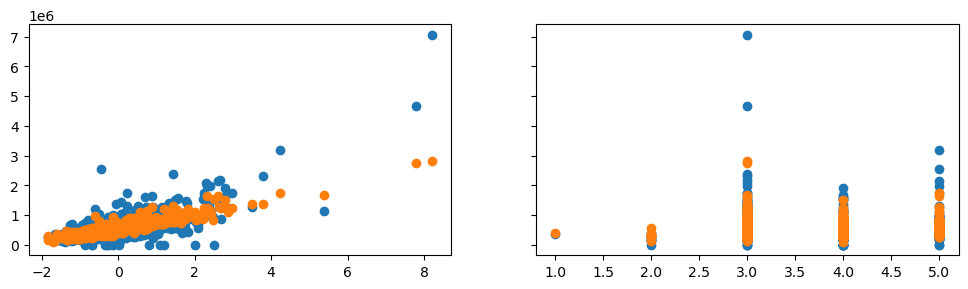

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
ax[0].scatter(X_test[:,0],y_test)
ax[0].scatter(X_test[:,0],y_pred)
ax[1].scatter(X_test[:,11],y_test)
ax[1].scatter(X_test[:,11],y_pred)